# Import Basic Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Read file form csv file

In [47]:
vtrain=pd.read_csv("/content/train_0OECtn8.csv")

In [48]:
vtest=pd.read_csv("/content/test_1zqHu22.csv")

#### Dimension of data

In [49]:
print(vtrain.shape)
print(vtest.shape)

(89197, 10)
(11121, 9)


In [50]:
vtrain.head()

,row_id,user_id,category_id,video_id,age,gender,profession,followers,views,engagement_score
0,1,19990,37,128,24,Male,Student,180,1000,4.33
1,2,5304,32,132,14,Female,Student,330,714,1.79
2,3,1840,12,24,19,Male,Student,180,138,4.35
3,4,12597,23,112,19,Male,Student,220,613,3.77
4,5,13626,23,112,27,Male,Working Professional,220,613,3.13


In [51]:
vtrain.sample(10)

,row_id,user_id,category_id,video_id,age,gender,profession,followers,views,engagement_score
34965,34966,9100,9,19,15,Male,Student,230,819,4.96
40854,40855,26565,25,139,12,Female,Student,240,317,3.04
80761,80762,26225,8,74,31,Female,Other,280,628,2.48
88993,88994,6473,6,12,20,Male,Student,210,362,2.80
81088,81089,21629,18,59,35,Male,Other,180,444,3.53
43212,43213,12034,31,152,17,Female,Student,230,156,4.31
62748,62749,19369,18,58,20,Male,Working Professional,180,444,3.16
79804,79805,3847,20,47,20,Female,Student,240,892,2.96
81855,81856,1643,16,137,29,Male,Working Professional,270,462,3.65
7025,7026,24054,25,61,28,Male,Other,240,317,3.78


In [52]:
vtest.head()

,row_id,user_id,category_id,video_id,age,gender,profession,followers,views
0,89198,7986,12,42,14,Male,Student,180,138
1,89199,11278,34,115,14,Male,Student,230,840
2,89200,17245,8,110,44,Female,Working Professional,280,628
3,89201,9851,16,137,18,Male,Student,270,462
4,89202,16008,34,96,47,Female,Other,230,840


#### Variable Datatype

In [53]:
vtrain.dtypes

row_id                int64
user_id               int64
category_id           int64
video_id              int64
age                   int64
gender               object
profession           object
followers             int64
views                 int64
engagement_score    float64
dtype: object

In [54]:
vtest.dtypes

row_id          int64
user_id         int64
category_id     int64
video_id        int64
age             int64
gender         object
profession     object
followers       int64
views           int64
dtype: object

#### Description of each numeric columns

In [55]:
vtrain.describe()

,row_id,user_id,category_id,video_id,age,followers,views,engagement_score
count,89197.000000,89197.000000,89197.000000,89197.000000,89197.000000,89197.000000,89197.000000,89197.000000
mean,44599.000000,13881.909806,18.323733,77.715383,24.848616,252.460172,502.980268,3.487797
std,25749.100318,8005.582771,11.675154,48.469656,8.955535,46.094468,268.569482,0.863498
min,1.000000,1.000000,1.000000,1.000000,10.000000,160.000000,30.000000,0.000000
25%,22300.000000,6945.000000,8.000000,34.000000,18.000000,230.000000,229.000000,2.900000
50%,44599.000000,13892.000000,16.000000,76.000000,23.000000,240.000000,467.000000,3.710000
75%,66898.000000,20819.000000,26.000000,120.000000,32.000000,280.000000,714.000000,4.150000
max,89197.000000,27734.000000,47.000000,175.000000,68.000000,360.000000,1000.000000,5.000000


In [56]:
vtest.describe()

,row_id,user_id,category_id,video_id,age,followers,views
count,11121.000000,11121.000000,11121.000000,11121.000000,11121.000000,11121.000000,11121.000000
mean,94758.000000,13825.707400,15.666487,79.742559,24.854150,249.691574,454.959986
std,3210.500506,8001.221954,10.313259,48.702501,8.953976,38.511469,249.759038
min,89198.000000,2.000000,1.000000,1.000000,10.000000,160.000000,44.000000
25%,91978.000000,6881.000000,8.000000,39.000000,18.000000,230.000000,229.000000
50%,94758.000000,13857.000000,12.000000,80.000000,23.000000,240.000000,369.000000
75%,97538.000000,20763.000000,25.000000,121.000000,32.000000,270.000000,662.000000
max,100318.000000,27734.000000,46.000000,174.000000,68.000000,360.000000,990.000000


#### Finding Null values

In [57]:
vtrain.isnull().sum().sort_values(ascending=False)

row_id              0
user_id             0
category_id         0
video_id            0
age                 0
gender              0
profession          0
followers           0
views               0
engagement_score    0
dtype: int64

In [58]:
vtest.isnull().sum().sort_values(ascending=False)

row_id         0
user_id        0
category_id    0
video_id       0
age            0
gender         0
profession     0
followers      0
views          0
dtype: int64

In [59]:
vtrain.duplicated().sum()

0

### Univariate Analysis

##### Gender

In [60]:
print(vtrain.gender.unique())
print(vtrain.gender.nunique())

['Male' 'Female']
2


In [61]:
print(vtrain.gender.value_counts())
print(vtest.gender.value_counts())

Male      52397
Female    36800
Name: gender, dtype: int64
Male      6377
Female    4744
Name: gender, dtype: int64


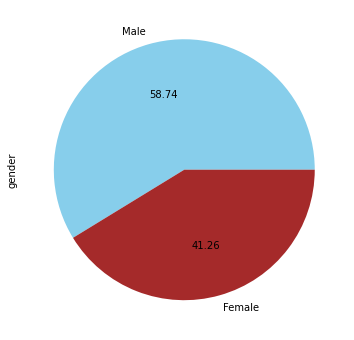

In [62]:
pd.value_counts(vtrain.gender).plot(kind="pie",autopct="%0.2f",colors=["skyblue","brown"],figsize=(12,6))

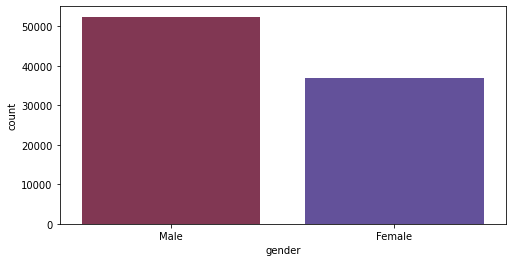

In [63]:
plt.figure(figsize=(8,4))
sns.countplot(x ='gender', data = vtrain,palette='twilight_r');

#### Profession

In [64]:
print(vtrain.profession.value_counts())
print(vtest.profession.value_counts())

Student                 44638
Other                   26840
Working Professional    17719
Name: profession, dtype: int64
Student                 5572
Other                   3366
Working Professional    2183
Name: profession, dtype: int64


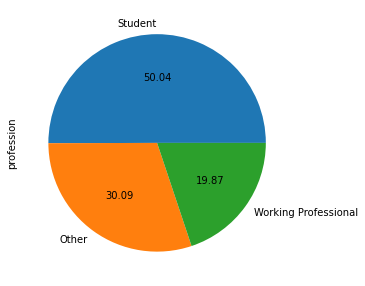

In [65]:
pd.value_counts(vtrain.profession).plot(kind="pie",autopct="%0.2f",figsize=(7,5))

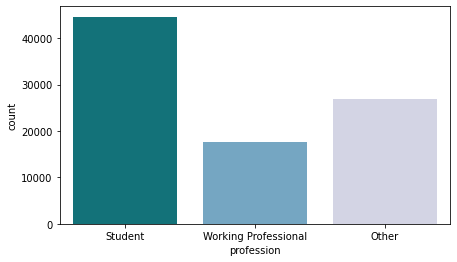

In [66]:
plt.figure(figsize=(7,4))
sns.countplot(x ='profession', data = vtrain,palette='PuBuGn_r');

#### Age

AxesSubplot(0.125,0.125;0.775x0.755)


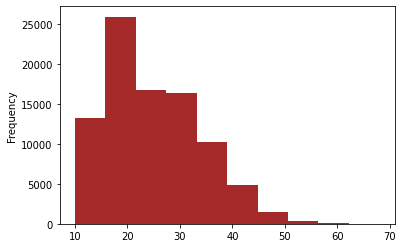

In [67]:
print(vtrain.age.plot(kind="hist",color="brown"))

AxesSubplot(0.125,0.125;0.775x0.755)


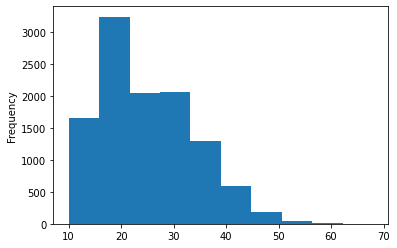

In [68]:
print(vtest.age.plot(kind="hist"))

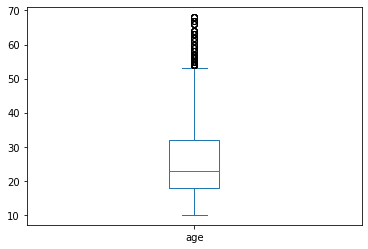

In [69]:
vtrain.age.plot(kind="box")

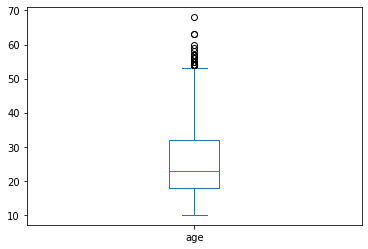

In [70]:
vtest.age.plot(kind="box")

#### After Log Transformation of Age

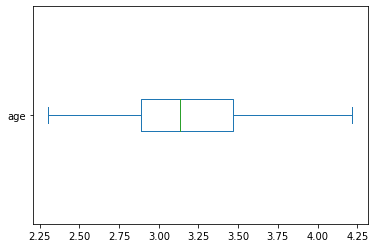

In [71]:
np.log(vtrain.age).plot(kind="box",vert=False)

In [72]:
vtrain.age=np.log(vtrain.age)

In [73]:
vtest.age=np.log(vtest.age)

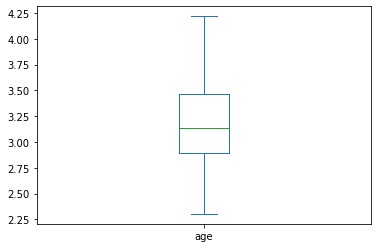

In [74]:
vtest.age.plot(kind="box")

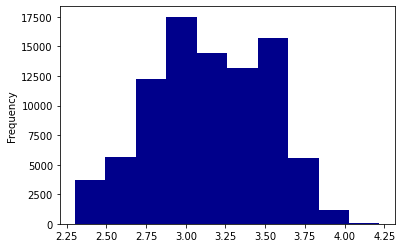

In [75]:
vtrain.age.plot(kind="hist",color="darkblue")

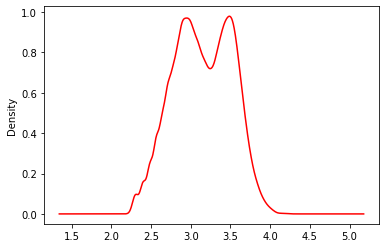

In [76]:
vtrain.age.plot(kind="density",color="red")

In [77]:
vtrain.age.head()

0    3.178054
1    2.639057
2    2.944439
3    2.944439
4    3.295837
Name: age, dtype: float64

#### Followers

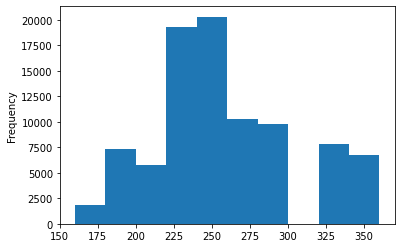

In [78]:
vtrain.followers.plot(kind="hist")

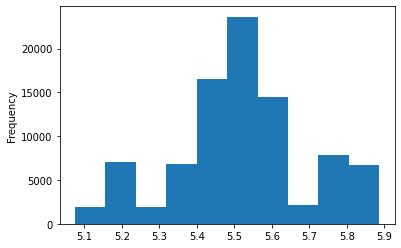

In [79]:
np.log(vtrain.followers).plot(kind="hist")

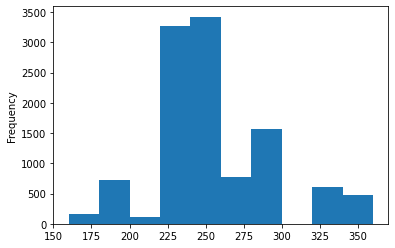

In [80]:
vtest.followers.plot(kind="hist")

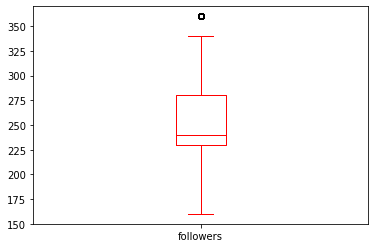

In [81]:
vtrain.followers.plot(kind="box", color="red")

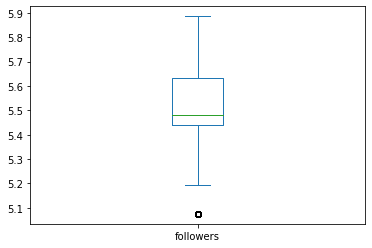

In [82]:
np.log(vtrain.followers).plot(kind="box")

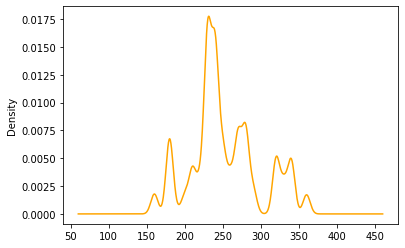

In [83]:
vtrain.followers.plot(kind="density", color="orange")

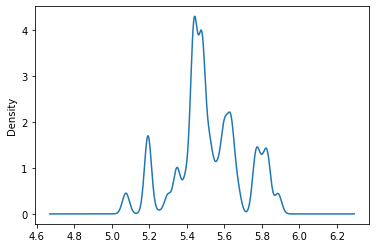

In [84]:
np.log(vtrain.followers).plot(kind="density")

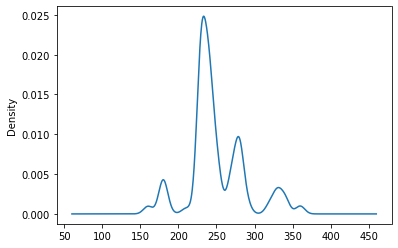

In [85]:
vtest.followers.plot(kind="density")

#### View

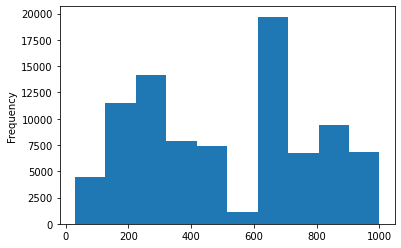

In [86]:
vtrain.views.plot(kind="hist")

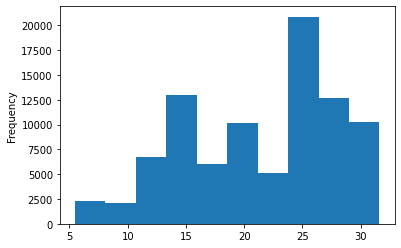

In [87]:
np.sqrt(vtrain.views).plot(kind="hist")

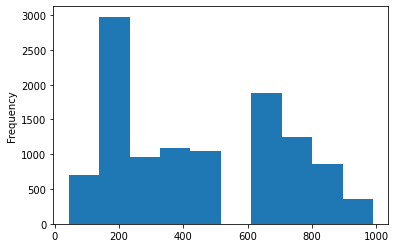

In [88]:
vtest.views.plot(kind="hist")

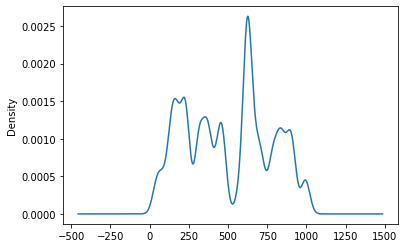

In [89]:
vtrain.views.plot(kind="density")

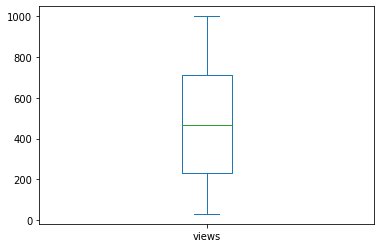

In [90]:
vtrain.views.plot(kind="box")

#### histogram (category_id)

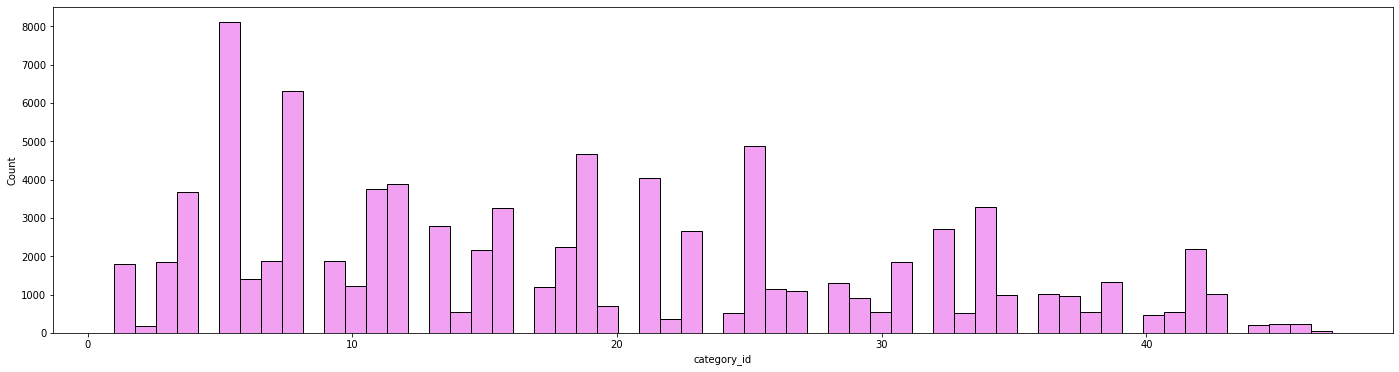

In [91]:
plt.figure(figsize=(24,6))
sns.histplot(data=vtrain, x="category_id",color='Violet');

#### Histogram (video_id)

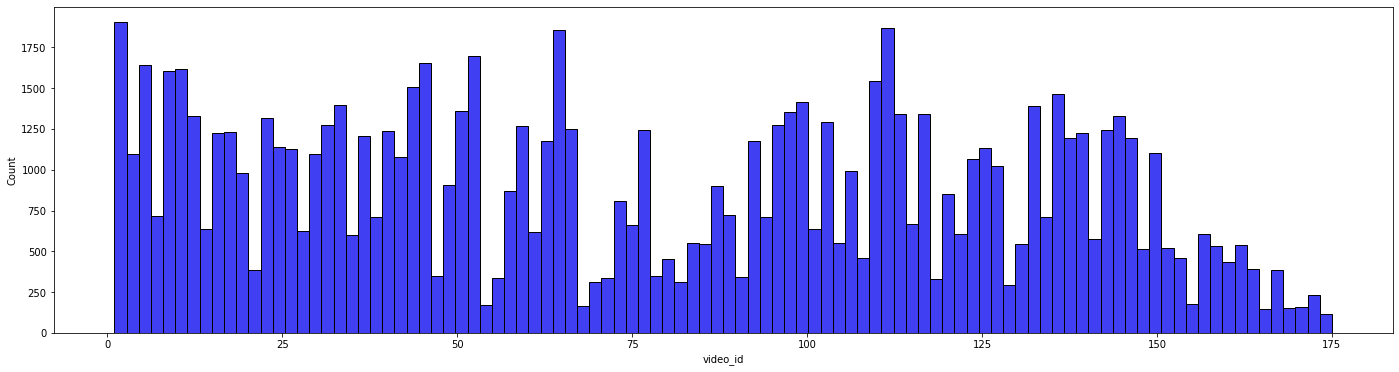

In [92]:
plt.figure(figsize=(24,6))
sns.histplot(data=vtrain, x="video_id",palette='binary_r',color='#0000EE',bins=100);

### Target Distribution (engagement_score)

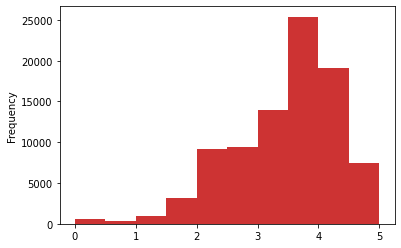

In [93]:
vtrain.engagement_score.plot(kind="hist",color="#CD3333")

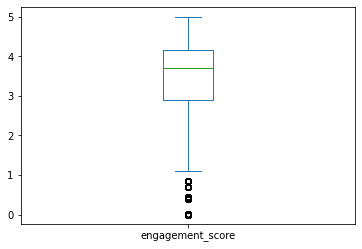

In [94]:
vtrain.engagement_score.plot(kind="box")

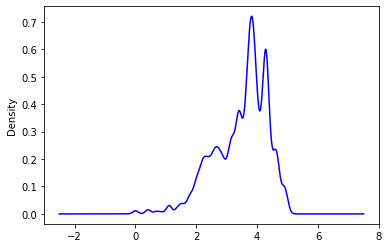

In [95]:
vtrain.engagement_score.plot(kind="density",color="blue")

#### Log Transformatio (engagement_score)

In [96]:
vtrain["engagement_score2"]=np.log(vtrain.engagement_score)

/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [97]:
vtrain.columns

Index(['row_id', 'user_id', 'category_id', 'video_id', 'age', 'gender',
       'profession', 'followers', 'views', 'engagement_score',
       'engagement_score2'],
      dtype='object')

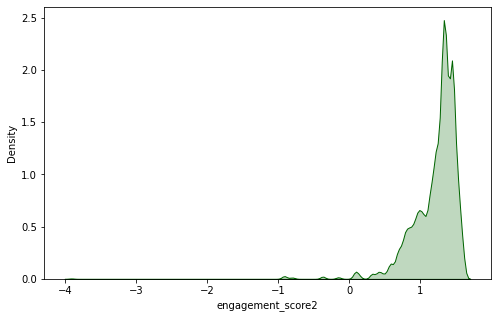

In [98]:
plt.figure(figsize=(8,5))
sns.kdeplot(vtrain['engagement_score2'],shade=True,color='#006400');

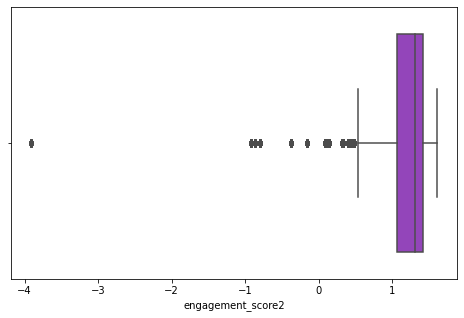

In [99]:
plt.figure(figsize=(8,5))
sns.boxplot(x=vtrain['engagement_score2'],color='#9A32CD');

In [100]:
vtrain=vtrain.drop(["engagement_score2"],axis=1)

### Bivarient Analysis

#### Groupby & crosstab

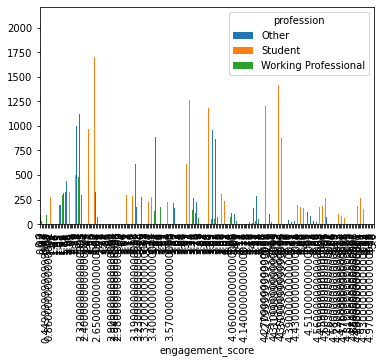

In [101]:
pd.crosstab(vtrain.engagement_score,vtrain.profession).plot(kind="bar",stacked=False)

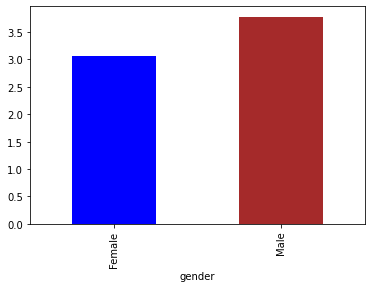

In [102]:
vtrain.engagement_score.groupby(vtrain.gender).mean().plot(kind="bar",
                                                                   stacked=False,
                                                                   color=["blue","brown"])

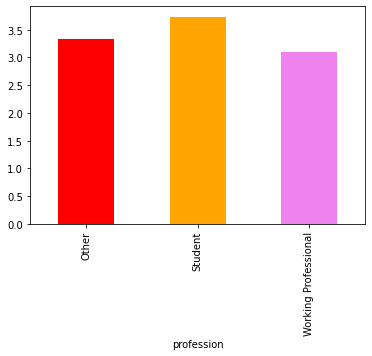

In [103]:
vtrain.engagement_score.groupby(vtrain.profession).mean().plot(kind="bar",
                                                                   stacked=False,
                                                                   color=["red","orange","Violet"])

#### Barplot (category_id VS engagement_score)

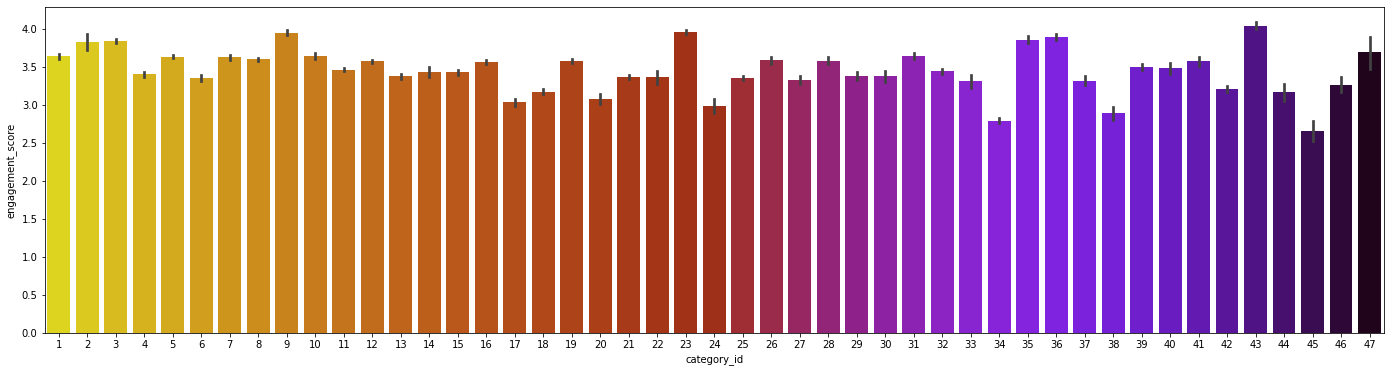

In [104]:
plt.figure(figsize=(24,6))
sns.barplot(x="category_id", y="engagement_score", data=vtrain,palette="gnuplot_r")

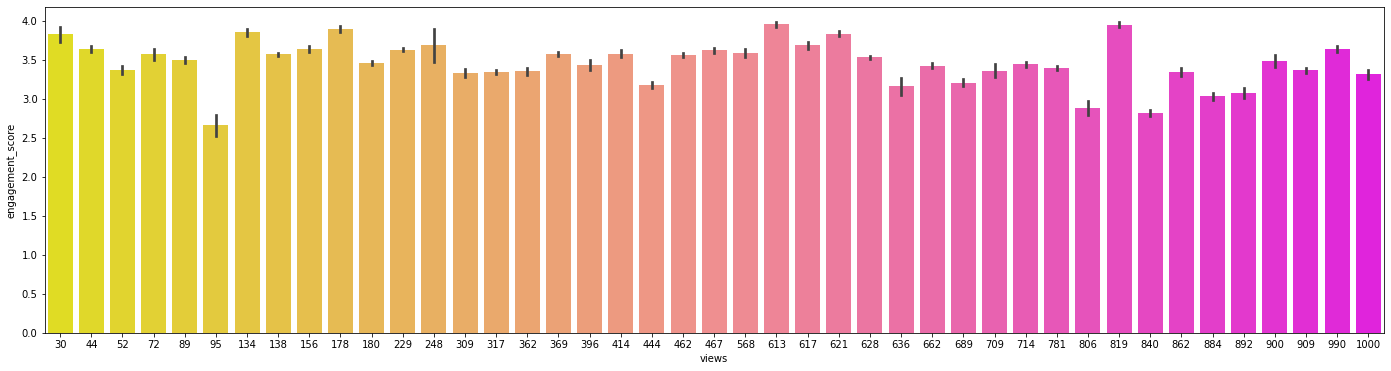

In [105]:
plt.figure(figsize=(24,6))
sns.barplot(x="views", y="engagement_score", data=vtrain,palette="spring_r")

### Multivariant Analysis

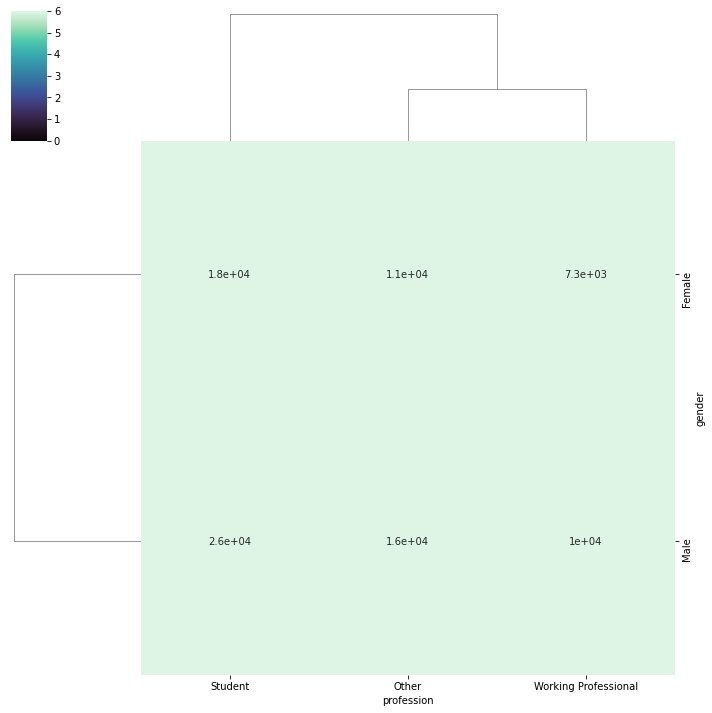

In [106]:
# plt.figure(figsize=(2,1))
sns.clustermap(pd.crosstab(vtrain['gender'],vtrain['profession']),annot=True,cmap="mako", vmin=0, vmax=6)

### Heatmap (correlation matrix )

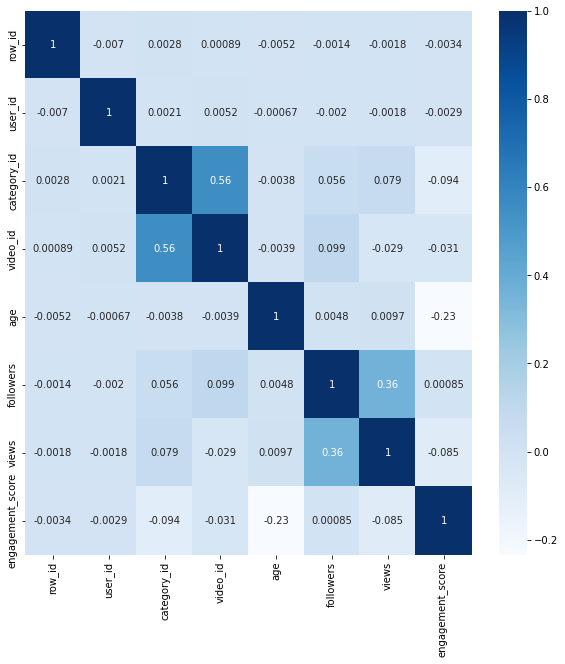

In [107]:
plt.figure(figsize=(10,10))
sns.heatmap(vtrain.corr(),annot=True,cmap=plt.cm.Blues)

### Hypothesis testing

#### T - Test (Gender VS Engagement_score)

In [108]:
vtrain.engagement_score.groupby(vtrain.gender).mean()

gender
Female    3.066688
Male      3.783555
Name: engagement_score, dtype: float64

In [109]:
Tm=vtrain[vtrain.gender=="Male"]
Tf=vtrain[vtrain.gender=="Female"]

In [110]:
from scipy.stats import ttest_ind

In [111]:
ttest_ind(Tm.engagement_score,Tf.engagement_score,equal_var=False)

# # pvalue=0.0  < 0.05 Reject Null hypothesis

Ttest_indResult(statistic=125.92823464925843, pvalue=0.0)

#### Anova test (Profession VS Engagement_score) 

In [112]:
vtrain.engagement_score.groupby(vtrain.profession).mean()

profession
Other                   3.329757
Student                 3.737970
Working Professional    3.096949
Name: engagement_score, dtype: float64

In [113]:
vtrain.engagement_score.groupby(vtrain.profession).var()

profession
Other                   0.681148
Student                 0.681012
Working Professional    0.657893
Name: engagement_score, dtype: float64

In [114]:
po=vtrain[vtrain.profession=="Other"]
ps=vtrain[vtrain.profession=="Student"]
pw=vtrain[vtrain.profession=="Working Professional"]

In [115]:
from scipy.stats import f_oneway 

In [116]:
f_oneway(po.engagement_score,ps.engagement_score,pw.engagement_score)

# pvalue=0.0  < 0.05 Reject Null hypothises

F_onewayResult(statistic=4561.178825969644, pvalue=0.0)

#### Chi-squared test (Gender VS Profession)

In [117]:
pd.crosstab(vtrain.gender,vtrain.profession)

profession,Other,Student,Working Professional
gender,,,
Female,11199,18307,7294
Male,15641,26331,10425


In [118]:
from scipy.stats import chi2_contingency

In [119]:
chi2_contingency(pd.crosstab(vtrain.gender,vtrain.profession))

# pvalue=0.1659319500847807  > 0.05  Null hypothises

(3.5923550278439342,
 0.1659319500847807,
 2,
 array([[11073.3769073 , 18416.29651221,  7310.32658049],
        [15766.6230927 , 26221.70348779, 10408.67341951]]))

### Library for Feature Transformation

In [120]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler

In [121]:
vtrain.head()

,row_id,user_id,category_id,video_id,age,gender,profession,followers,views,engagement_score
0,1,19990,37,128,3.178054,Male,Student,180,1000,4.33
1,2,5304,32,132,2.639057,Female,Student,330,714,1.79
2,3,1840,12,24,2.944439,Male,Student,180,138,4.35
3,4,12597,23,112,2.944439,Male,Student,220,613,3.77
4,5,13626,23,112,3.295837,Male,Working Professional,220,613,3.13


#### Drop unnecessary variable 

In [122]:
vtrain=vtrain.drop(["row_id"],axis=1)

In [123]:
vtest=vtest.drop(["row_id"],axis=1)

In [124]:
print(vtrain.shape)
print(vtest.shape)

(89197, 9)
(11121, 8)


### Feature Transformation (Handling Categorical Features,Feature Scaling)


In [125]:
transformer = ColumnTransformer(transformers=[
    ('tnf1',MinMaxScaler(),['user_id','followers','views']),
    ('tnf2',OrdinalEncoder(categories=[['Student','Other','Working Professional']]),['profession']),
    ('tnf3',OneHotEncoder(sparse=False,drop='first'),['gender','category_id','video_id'])
],remainder='passthrough')

In [126]:
vtrain.head()

,user_id,category_id,video_id,age,gender,profession,followers,views,engagement_score
0,19990,37,128,3.178054,Male,Student,180,1000,4.33
1,5304,32,132,2.639057,Female,Student,330,714,1.79
2,1840,12,24,2.944439,Male,Student,180,138,4.35
3,12597,23,112,2.944439,Male,Student,220,613,3.77
4,13626,23,112,3.295837,Male,Working Professional,220,613,3.13


In [127]:
y=vtrain['engagement_score']

In [128]:
x=vtrain.drop('engagement_score',axis=1)

In [129]:
x=transformer.fit_transform(x)

In [130]:
x.shape

(89197, 226)

In [131]:
Xtest=transformer.transform(vtest)

In [132]:
Xtest.shape

(11121, 226)

# LinearRegression

In [133]:
from sklearn.linear_model import LinearRegression

In [134]:
reg=LinearRegression()

In [135]:
regmodel=reg.fit(x,y)

In [136]:
regmodel.score(x,y)

0.3323435528177098

In [137]:
regpredict=regmodel.predict(x)

In [138]:
regresidual=y-regpredict

In [139]:
np.sqrt(np.mean(regresidual)**2)

6.52742828012166e-06

# Decision Tree  

In [147]:
from sklearn.tree import DecisionTreeRegressor

In [148]:
tree=DecisionTreeRegressor(max_depth=38).fit(x,y)

In [149]:
tree.score(x,y)

0.8992424884466135

In [150]:
treepredict=tree.predict(x)

In [151]:
treeresidual=y-treepredict

In [152]:
np.sqrt(np.mean(treeresidual**2))

0.2740928085438899

In [153]:
Testtreepredict=tree.predict(Xtest)

In [156]:
pd.DataFrame(Testtreepredict).to_csv("Dtree.csv")

# Random Forest 

In [157]:
from sklearn.ensemble import RandomForestRegressor

In [158]:
rf=RandomForestRegressor().fit(x,y)

In [159]:
rf.score(x,y)

0.9135926689902576

In [160]:
rfpredict=rf.predict(x)

In [161]:
rfresidual=y-rfpredict

In [162]:
np.sqrt(np.mean(rfresidual**2))

0.2538248976801852

In [163]:
rftestpredict=rf.predict(Xtest)

In [164]:
pd.DataFrame(rftestpredict).to_csv("RANDOM_forest123.csv")

# GradientBoosting

In [165]:
from sklearn.ensemble import GradientBoostingRegressor

In [166]:
gb=GradientBoostingRegressor()

In [167]:
gbmodel=gb.fit(x,y)

In [168]:
gbmodel.score(x,y)

0.34099167442459855

In [169]:
gbpredict=gbmodel.predict(x)

In [170]:
gbresidual=y-gbpredict

In [171]:
np.sqrt(np.mean(gbresidual**2))

0.7009779792350849

# KNeighbors

In [172]:
from sklearn.neighbors import KNeighborsRegressor

In [173]:
knn=KNeighborsRegressor(n_neighbors=5,weights='distance')

In [174]:
knnmodel=knn.fit(x,y)

In [175]:
knnmodel.score(x,y)

1.0

In [176]:
knnpredict=knnmodel.predict(x)

In [177]:
knnresidual=y-knnpredict

In [178]:
np.sqrt(np.mean(knnresidual**2))

0.0

# Random Forest Regressor gives us best Result